# 基本设置

## 常用数据处理包

In [1]:
# 常用数据处理包
import numpy as np        # 矩阵基本处理 ndarray
import scipy as sp        # 线性代数
import pandas as pd       # 数据整理 Serial, DataFrame
import matplotlib.pyplot as plt   # 画图工具
import seaborn as sns  # 画图，seaborn基于matplotlib, 其设置仍旧有效

## 图片的缺省设置

In [2]:
%matplotlib inline 
sns.set(font="DejaVu Sans", font_scale=1.8,
           rc={'figure.figsize': (10, 10),
            'lines.markersize': 15,
            "animation.embed_limit": 100})

# Numpy & Scipy

## 随机产生均匀分布函数

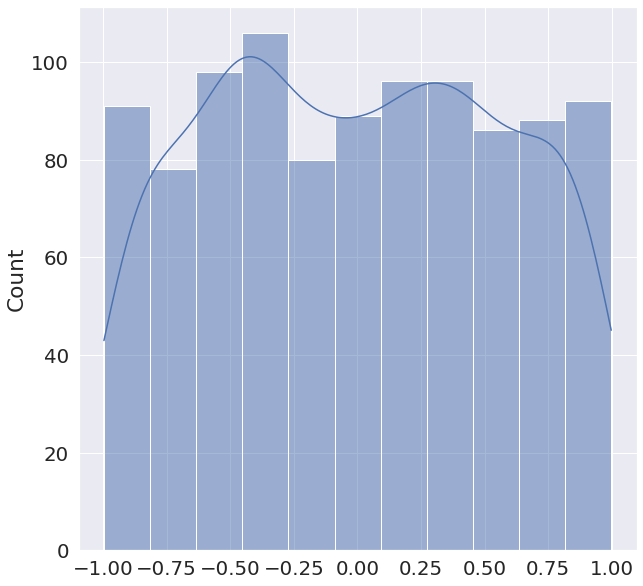

In [3]:
n = 1000
x = np.random.uniform(-1.0,1.0,n)
#pd.DataFrame({"X": x}).plot.kde(shade=True)
sns.histplot(x,kde=True)

## 回归分析

### 最小二乘拟合函数

In [4]:
# 最小二乘拟合函数

def testlm(x):
    global  a 
    a = np.array([34,0,24,0,10,0,37,0,45,0,0,3,2,0]).reshape(14,1)

    func = (np.arange(1,6)*np.pi).reshape(1,5)
    nois = np.array([[13.0,15.0]]) * np.pi 
    
    zsin = np.sin(x*func)
    zcos = np.cos(x*func)
    nsin = np.sin(x*nois)
    ncos = np.cos(x*nois)

    z = np.hstack((zsin,zcos,np.ones((len(x),1))))
    y = np.dot(np.hstack((zsin,zcos,nsin,nsin)),a)

    return np.linalg.lstsq(z,y, rcond=None)  # linalg 在 numpy scipy scikit-learn 中都有

### 回归结果函数

In [5]:
r = testlm(x.reshape(n,1))
print("redues: ", r[1])

dfsm = pd.DataFrame({"Origal": a[0:9].reshape(9,),
                     "Fitting": r[0][0:9].reshape(9,),
                     "Difference": (r[0][0:9] - a[0:9]).reshape(9,)},
                      columns=['Origal', 'Fitting', 'Difference'])
dfsm

redues:  [6539.87446042]


,Origal,Fitting,Difference
0,34,34.139579,0.139579
1,0,0.076049,0.076049
2,24,24.050492,0.050492
3,0,0.018293,0.018293
4,10,9.873630,-0.126370
5,0,-0.246655,-0.246655
6,37,36.778169,-0.221831
7,0,-0.167487,-0.167487
8,45,44.850181,-0.149819


### 拟合比较

In [6]:
#for col in ["Origal", "Fitting"]:
#    sns.barplot(np.arange(0,9),dfsm[col]，
#                alpha=0.5)

### 参数差

Text(0, 0.5, 'Difference')

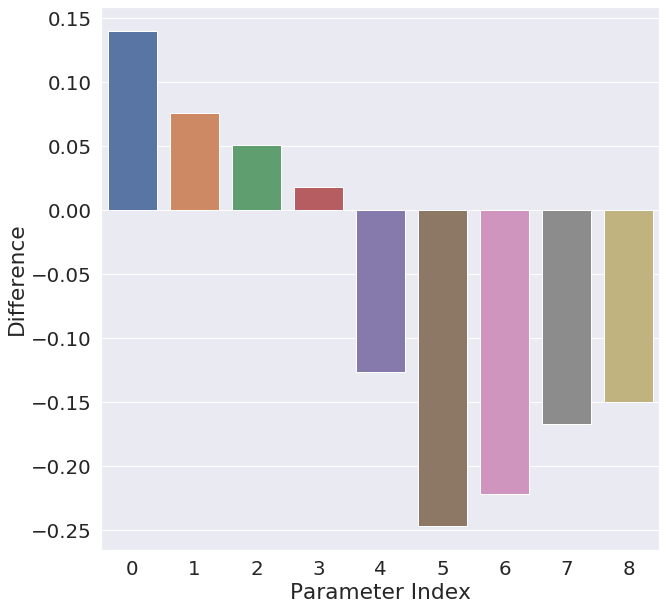

In [7]:
## 画出结果
sns.barplot(x=np.arange(0,9),y=dfsm["Difference"])
plt.xlabel("Parameter Index")
plt.ylabel("Difference")

## 傅里叶分析

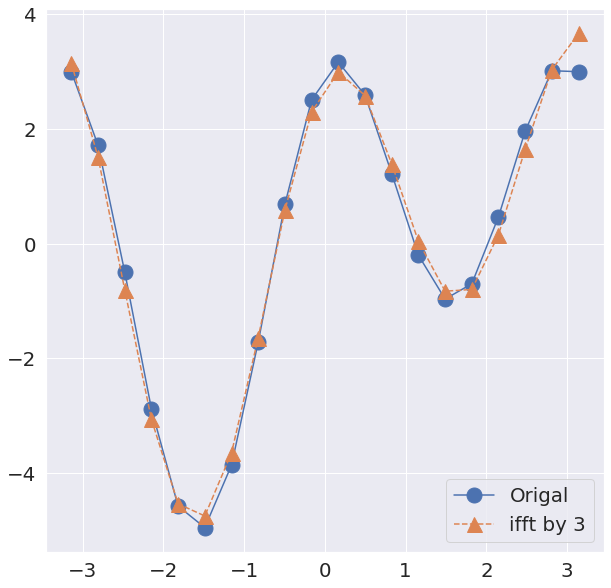

In [8]:
x  = np.linspace(-np.pi, np.pi, 20)
y  = 2*np.sin(x) + 3*np.cos(2*x)

cut = 3
yf = np.fft.rfft(y)
yi = np.fft.irfft(yf[0:cut],len(y))

plt.plot(x,y,"o-", x,yi,"^--")
plt.legend(("Origal", "ifft by "+str(cut)))


# Pandas 数据操作 & Seaborn 画图

## 数据分裂

In [9]:
# 数据操作
df = pd.DataFrame({"key": np.concatenate((np.full((10),"A") , np.full((10),"B"))), 
                   "idx": np.concatenate((np.arange(10), np.arange(10))),
                   "v1" : np.random.randn(20), "v2":np.random.randn(20)})
df.head(15)

,key,idx,v1,v2
0,A,0,-1.686970,0.426173
1,A,1,0.994643,-0.005449
2,A,2,0.605113,0.901605
3,A,3,0.301291,0.235654
4,A,4,-0.326798,0.298910
5,A,5,-1.106832,-2.445690
6,A,6,0.582048,-0.525275
7,A,7,0.805592,0.064066
8,A,8,-0.145578,2.392292
9,A,9,-0.657641,0.459107


In [10]:
# 按 key 列分 v1 数据并画图
dfk = df.pivot(columns='key', values='v1', index="idx") 
dfk

key,A,B
idx,,
0,-1.686970,0.446318
1,0.994643,0.197648
2,0.605113,0.375030
3,0.301291,-0.788922
4,-0.326798,-1.172699
5,-1.106832,0.916212
6,0.582048,1.465931
7,0.805592,0.256348
8,-0.145578,-0.796872


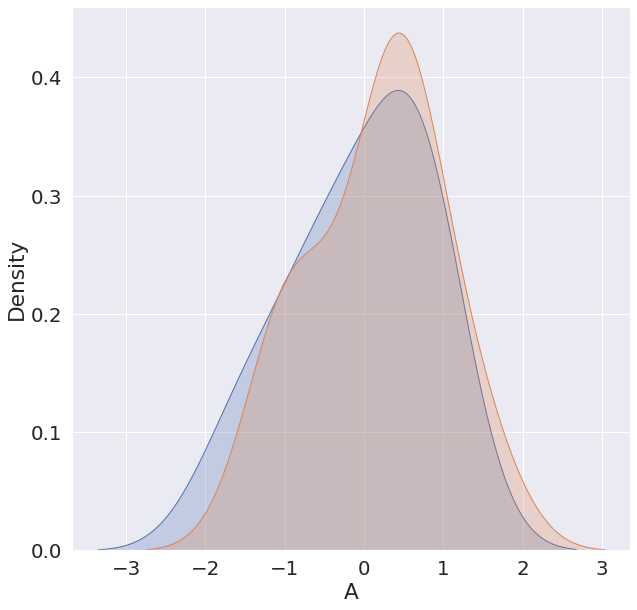

In [11]:
for col in "AB":
    sns.kdeplot(dfk[col],shade=1)

## 数据融合与子图

In [12]:
# column title to a column 
mdf = pd.melt(df, id_vars=["key"], value_vars=["v1","v2"], 
              value_name="data")
mdf.head(15)

,key,variable,data
0,A,v1,-1.686970
1,A,v1,0.994643
2,A,v1,0.605113
3,A,v1,0.301291
4,A,v1,-0.326798
5,A,v1,-1.106832
6,A,v1,0.582048
7,A,v1,0.805592
8,A,v1,-0.145578
9,A,v1,-0.657641


Text(-0.01, 0.55, 'Density')

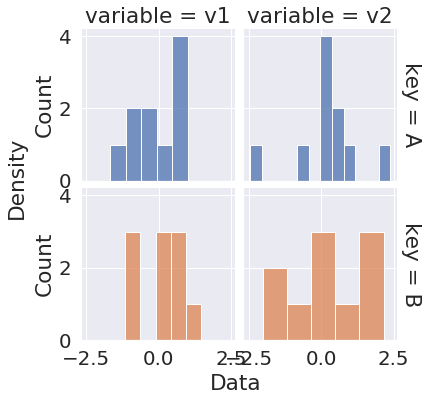

In [13]:
# 按 key, variable 画图
g = sns.FacetGrid(mdf, row="key", col="variable", hue="key",
                  margin_titles=1, aspect=1)
g.map(sns.histplot, "data")
g.set_xlabels("")
g.fig.subplots_adjust(wspace=0.05,hspace=0.05) 
g.fig.text(0.52, 0.06, 'Data', ha='center')
g.fig.text(-0.01, 0.55, 'Density', va='center', 
           rotation='vertical')

## 数据分组

In [14]:
grp = df.groupby("key") # 数据分组
grp.mean() # 求平均

,idx,v1,v2
key,,,
A,4.5,-0.063513,0.180139
B,4.5,0.147099,0.242347


# Matplotlib

## 中文字体设置

### 配置系统字体

 - matplotlib默认不支持ttc，所以可以将ttc转换ttf先。
 - 将Windows字体 simsun.ttc上传到 https://transfonter.org/ttc-unpack 在线转换成TTF，
 - 得到simsun.ttf和nsimsun.ttf，将两个ttf文件放到PYTHON的字体目录之下
 - 删除字体缓存以便重新生成字体缓存：$HOME/.matplotlib/fontList.py3k.cache

### 设置字体
- 全局中文设置
``` Python
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman'
```
 
- 局部中文设置
``` Python
cfp = FP('NSimSun', size=12)
efp = FP('Times New Roman', size=12)
ax.set_ylabel('d', fontproperties=efp, rotation=0)
ax.legend((rects1[0], rects2[0]), ('处理A', '处理B'), prop=cfp, framealpha=0)
```

## 图形设置

### 常用命令

1. plt.style.library   列出所有可供选择的style及其项目
2. plt.style.available 列出可供选择的 style
3. mpl.get_configdir() 配置文件夹
4. sns.plt.cmd         在seaborn 系列中调用 matplotlib 命令
5. sns.fig.cmd         在seaborn 对象中调用 matplotlib 命令

### 字体设置
``` Python
plt.style.use("ggplot")  # plt.style.available 获取选择，查看 
                         # http://matplotlib.org/gallery.html#style_sheets
font_options = {"family" :'Helvetica',  
                 "weight":'bold',       
                 "size" : 20}            
plt.rc("figure", figsize=(6.18, 3.82))   # 设置缺省参数
plt.rc('font', **font_options) # 参考 plt.style.library 进行修改
# 也可 http://matplotlib.org/_static/matplotlibrc  
```

### 坐标设置
``` Python
plt.locator_params(nbins=4)  设置坐标数目，numticks for log
```

## 多子图

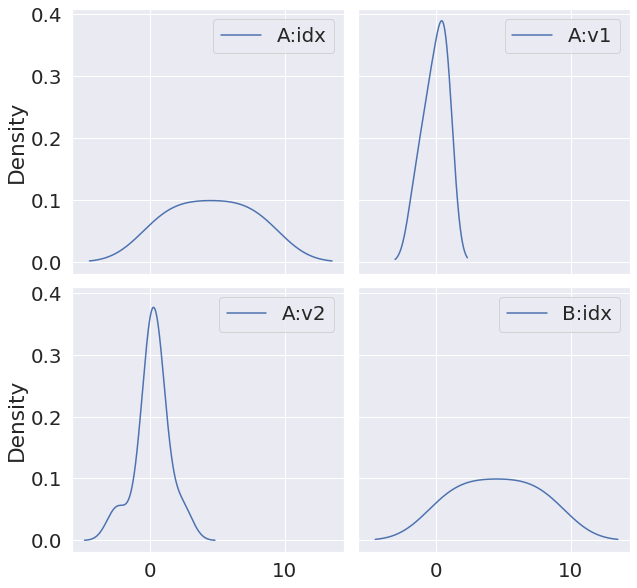

In [15]:

df2 = df.set_index('key').stack()  # 重组数据
grps = df2.groupby(df2.index)      # 数据分组

fig, axs = plt.subplots(2,2,sharex=True,sharey=True)   # 2x2子图，共享坐标
for ax,(nm,grp) in zip(axs.reshape(4), grps):          # 将分组与子图对应，并分别画图
    grp.plot.kde(ax=ax)
    ax.legend([':'.join(nm)])      # 使用分组标记标记子图，参数best可以自动选择
#    ax.set_ylim(0,0.6)         # 调节坐标范围
#    ax.set_xlim(-5.5,5.5)

fig.subplots_adjust(wspace=0.05,hspace=0.05) # 调节子图间距离

# Scikit-Learn

## PCA 分析

### 初始数据

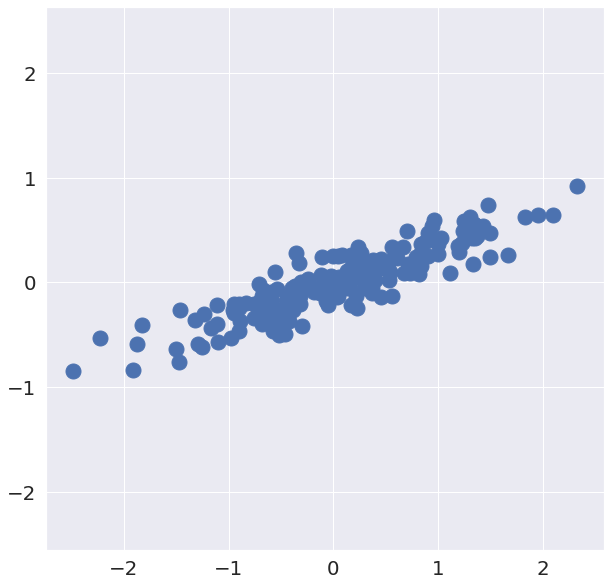

In [16]:
# 产生数据
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

### 固定输出坐标数目

In [17]:
# 进行PCA分析
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
pd.DataFrame(np.hstack((pca.components_, 
             pca.explained_variance_.reshape(pca.n_components_,1))),
             columns =("X-axis", "Y-axis", "Value"))

,X-axis,Y-axis,Value
0,-0.944460,-0.328626,0.762532
1,-0.328626,0.944460,0.018478


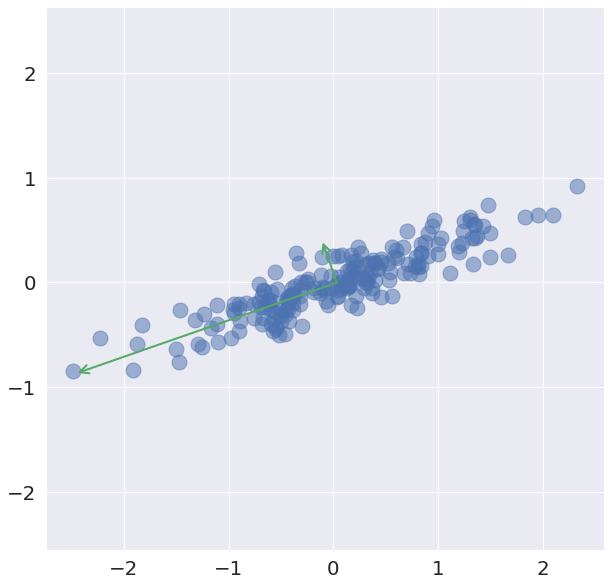

In [19]:
def draw_vector(v0, v1, ax=None): 
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2,
                    shrinkA=0, shrinkB=0, color='g')
    ax.annotate('', v1, v0, arrowprops=arrowprops)
            
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

### 输出固定信息量

In [20]:
pca = PCA(n_components=0.95)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
pd.DataFrame(np.hstack((pca.components_, pca.explained_variance_.reshape(1,1))),
             columns =["X-axis", "Y-axis", "Value"])

,X-axis,Y-axis,Value
0,-0.94446,-0.328626,0.762532
